In [1]:
import pandas as pd
import numpy as np
import urllib
import os

from sklearn import model_selection

import tensorflow as tf
import keras as K
import numpy as np

import matplotlib.pyplot as plt

from scipy.misc import toimage

%matplotlib inline

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
def model_loader(model_name='vgg16_tl', weight_name='vgg16_tl', path=''):
    
    if path != '':
        path_json = path + '/' + model_name + '.json'
    else:
        path_json = model_name + '.json'
        
    with open(path_json, 'r') as json_file:
        model_json = json_file.read()
        
    model = K.models.model_from_json(model_json)
    
    if path != '':
        path_weights = path + '/' + weight_name + '.hdf5'
    else:
        path_weights = weight_name + '.hdf5'

    model.load_weights(path_weights)
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return(model)

In [0]:
def img_check(path_img, model):
    
    img = K.preprocessing.image.load_img(path_img, target_size=(224, 224))
    plt.imshow(img)
    
    img_array = np.expand_dims(K.preprocessing.image.img_to_array(img), axis=0)/255
    
    print('Вероятность того что это не NewBalance:', model.predict(img_array)[0][0])
    
    return(model)

In [0]:
path = '/content/gdrive/My Drive/NewBalance/'
path_img = '/content/gdrive/My Drive/NewBalance//Images/test/not_newbalance/821.jpg'

In [6]:
vgg16 = model_loader(path=path)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Вероятность того что это не NewBalance: 0.99128246


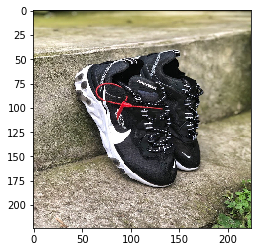

In [7]:
img_check(path_img, vgg16)

In [8]:
batch_size = 32
target_size = (224, 224)

data_gen = K.preprocessing.image.ImageDataGenerator(rescale=1/255)

test_gen = data_gen.flow_from_directory('/content/gdrive/My Drive/NewBalance//Images/test',
                                        target_size=target_size, batch_size=batch_size, class_mode='binary')

Found 248 images belonging to 2 classes.


In [9]:
vgg16.evaluate_generator(test_gen, steps=test_gen.samples//batch_size)

[0.1948279194932963, 0.96875]